# Reward Training Analysis

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# NAc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"
brain_region = '#15616F'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
# brain_region = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00
save_path = r'graphs'
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"


In [3]:
exp = Reward_Training(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
read from t=0s to t=3853.09s
read from t=0s to t=3853.09s


In [4]:
exp.trials

{'n5-240911-062153': <trial_class.Trial at 0x2689516e960>,
 'nn1-250202-133348': <trial_class.Trial at 0x268901cd1f0>,
 'nn2-250202-133348': <trial_class.Trial at 0x26894adeb40>}

In [5]:
exp.rtc_processing()
exp.create_base_df(experiment_path)
exp.remove_specified_subjects()  # Removes subjects with bad expression or bad fiber placement
exp.extract_da_columns()  # cleans up dataframe and allocates it into a new place

Processing trial n5-240911-062153...
Processing trial nn1-250202-133348...
Processing trial nn2-250202-133348...
           file name                                             trial  \
0   n5-240911-062153  <trial_class.Trial object at 0x000002689516E960>   
1  nn1-250202-133348  <trial_class.Trial object at 0x00000268901CD1F0>   
2  nn2-250202-133348  <trial_class.Trial object at 0x0000026894ADEB40>   

  subject_name                                         sound cues  \
0           n5  {'name': 'PC0/', 'onset': [0.0, 242.655232, 32...   
1          nn1  {'name': 'PC0/', 'onset': [0.0, 243.75033856, ...   
2          nn2  {'name': 'PC0/', 'onset': [0.0, 243.75033856, ...   

                                        port entries  \
0  {'name': 'PC3/', 'onset': [0.0, 182.65473024, ...   
1  {'name': 'PC2/', 'onset': [0.0, 183.75000064, ...   
2  {'name': 'PC3/', 'onset': [0.0, 183.75000064, ...   

                                    sound cues onset  \
0  [242.655232, 322.65568256, 41

In [ ]:
exp.find_first_port_entry_after_sound_cue().head(1)

# Currently, how licks cutoffs are universally 4 seconds after lick. Should I use the offset or not?
exp.compute_closest_port_offset(PE_column='first_PE_after_sound_cue', offset_column='filtered_port_entry_offset')  # Find the port offest that aligns with the first valid lick
exp.compute_EI_DA()
exp.compute_rtc_da_metrics()


## Finding DA metrics

Code to look at a single trial DA response

In [ ]:
# # Select a trial (e.g., the first trial)
# trial = df.iloc[0]

# # Extract the first tone and lick responses (if multiple events exist)
# tone_time = trial['Tone Event_Time_Axis'][0]  # should be -pre_time to post_time
# tone_zscore = trial['Tone Event_Zscore'][0]
# lick_time = trial['Lick Event_Time_Axis'][0]  # should be 0 to post_time
# lick_zscore = trial['Lick Event_Zscore'][0]

# # Plotting both traces
# plt.figure(figsize=(8, 4))
# plt.plot(tone_time, tone_zscore, label='Tone Event (Sound Cue)')
# plt.plot(lick_time, lick_zscore, label='Lick Event')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Baseline-corrected z-score')
# plt.title('Tone and Lick DA Responses')
# plt.legend()
# plt.show()


## PSTH For first and last tones

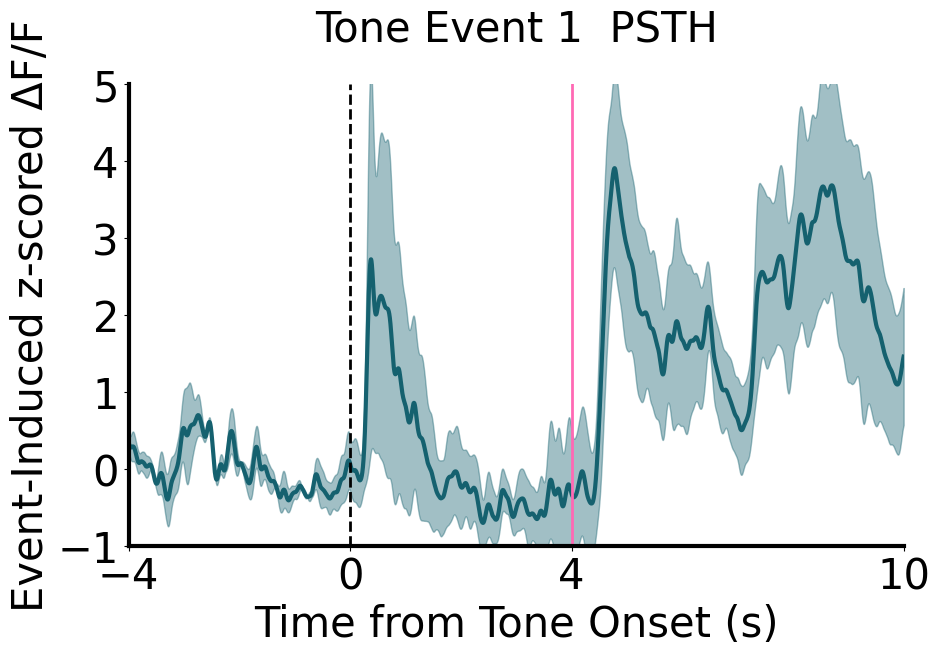

In [ ]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='NAc', condition= '', y_min=-1, y_max=5, bin_size=100)
# exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1.5, df=None, bin_size=100)

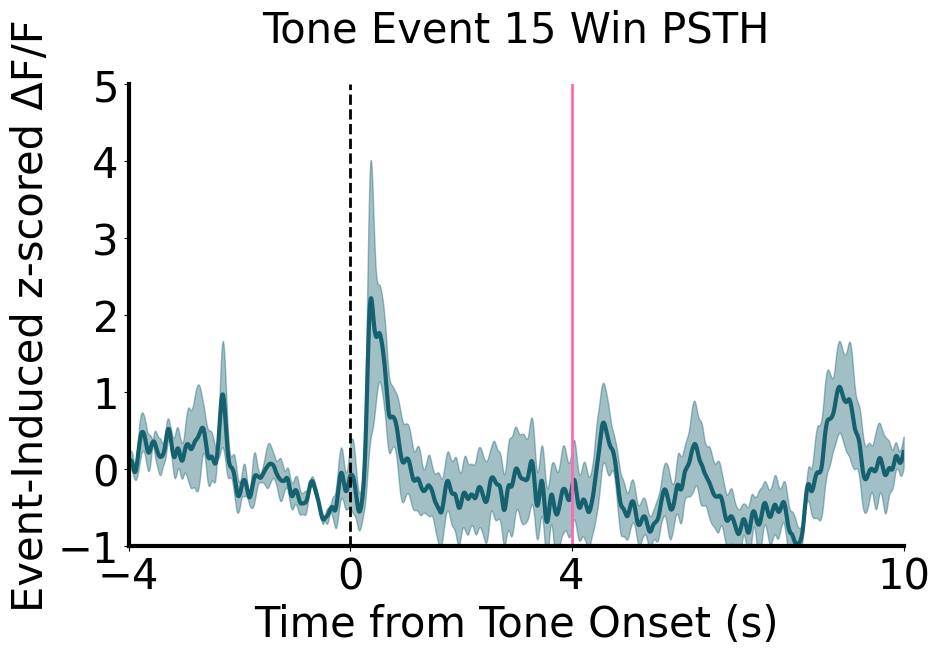

No trials have an event at index 15 for Tone.


In [ ]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=save_path, brain_region='NAc', y_min=-1, y_max=5, bin_size=100)
exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=2, bin_size=100)

## Heat maps

In [ ]:
exp.plot_event_index_heatmap(event_type = 'Tone', 
                             max_events = 15, 
                             directory_path = save_path, 
                             brain_region = 'NAc', 
                             vmin = -0.2, 
                             vmax = 6, df=None, bin_size=100)

# exp.plot_event_index_heatmap(event_type = 'Tone', 
#                              max_events = 15, 
#                              directory_path = save_path,
#                              brain_region = 'mPFC', 
#                              vmin = -0.3, 
#                              vmax = 2, df=None, bin_size=100)

No Tone event time axes found.


# To Do

### Mean DA Across Trials - Linear